In [28]:
#Bibliotecas Necessárias
import numpy as np
import streamlit as st
import plotly.graph_objects as go


In [56]:
V_cilindro = 24.2/1000           # Volume do cilindro 
taxa_compressao = 14        # Taxa de compressão
R = 287                     # Constante específica dos gases em J/(kg·K)
gamma = 1.4                 # Razão de calor específico para ar
P_atm = 1.01325 * 10**5     # Razão de calor específico para ar
T_amb = 25 + 273.15         # Razão de calor específico para ar
n_cilindros = 12            # Número de cilindros
    
    # Valores de velocidade angular (RPM) para o gráfico
omega_values = np.linspace(1000, 6000, 20)

    # Diâmetro do pistão em metros
diametro_pistao_128 = 128 / 1000  # Convertendo para metros
    

In [129]:
def calcular_torque(omega_values, n_cil, diametro_pistao, V_cilindro, taxa_compressao, R, gamma, P_atm, T_amb):
    V_comb = V_cilindro / (taxa_compressao - 1)
    m_ar = (P_atm * V_comb) / (R * T_amb)
    torque_values = m_ar * (gamma * R * T_amb) * (1 - (1 / (omega_values * n_cil * V_comb))) * (diametro_pistao / 2)**2 * np.pi
    return torque_values

def calcular_potencia(torque_values, omega_values):
    return (torque_values * omega_values * 2 * np.pi / 60)/1000

# Função para calcular o consumo específico
def calcular_consumo_especifico(torque_values, omega_values, n_cil, V_cilindro, taxa_compressao, R, gamma, P_atm, T_amb):
    V_comb = V_cilindro / (taxa_compressao - 1)
    m_ar = (P_atm * V_comb) / (R * T_amb)
    return (m_ar * gamma * R * T_amb) / (calcular_potencia(torque_values, omega_values) + 1e-10)


In [130]:
torque_values_128 = calcular_torque(omega_values, n_cilindros, diametro_pistao_128, V_cilindro, taxa_compressao, R, gamma, P_atm, T_amb)
potencia_values_128 = calcular_potencia(torque_values_128, omega_values)
consumo_especifico_values_128 = calcular_consumo_especifico(torque_values_128, omega_values, n_cilindros, V_cilindro, taxa_compressao, R, gamma, P_atm, T_amb)


In [132]:
def plotar_graficos(omega_values, torque_values, potencia_values, consumo_especifico_values, diametro_pistao):
    fig = go.Figure()
    
    # Adicionando as curvas de torque e potência
    fig.add_trace(go.Scatter(x=omega_values, y=torque_values, mode='lines', name='Torque', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=omega_values, y=potencia_values, mode='lines', name='Potência', line=dict(color='green')))
    
    # Adicionando a curva de consumo específico
    fig.add_trace(go.Scatter(x=omega_values, y=consumo_especifico_values, mode='lines', name='Consumo Específico', line=dict(color='red')))
    
    # Configurando os eixos para torque e potência
    max_torque_potencia = max(max(torque_values), max(potencia_values))
    fig.update_layout(yaxis=dict(title='Torque (N.m) / Potência (kW)', range=[0, max_torque_potencia * 1.1]))
    
    # Configurando o eixo para consumo específico
    max_consumo_especifico = max(consumo_especifico_values)
    fig.update_layout(yaxis2=dict(title='Consumo Específico (kg/W.s)', overlaying='y', side='right', range=[0, max_consumo_especifico * 1.1]))
    
    # Configurando o eixo x
    fig.update_layout(xaxis=dict(title='RPM'))
    
    # Configurando layout geral
    fig.update_layout(title=f'Desempenho do Motor (Diâmetro do Pistão: {diametro_pistao * 1000} mm)',
                      height=600, width=1000)
    
    return fig



In [134]:
import matplotlib.pyplot as plt

def plotar_graficos(omega_values, torque_values, potencia_values, consumo_especifico_values, diametro_pistao):
    # Criando a figura e os eixos
    fig, ax1 = plt.subplots()

    # Plotando as curvas de torque e potência
    ax1.plot(omega_values, torque_values, 'b-', label='Torque')
    ax1.plot(omega_values, potencia_values, 'g-', label='Potência')
    
    # Definindo rótulos e cores dos eixos para torque e potência
    ax1.set_xlabel('RPM')
    ax1.set_ylabel('Torque (N.m) / Potência (kW)', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    
    # Adicionando a curva de consumo específico
    ax2 = ax1.twinx()
    ax2.plot(omega_values, consumo_especifico_values, 'r-', label='Consumo Específico (kg/W.s)')
    ax2.set_ylabel('Consumo Específico (kg/W.s)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    # Configurando layout geral
    fig.suptitle(f'Desempenho do Motor (Diâmetro do Pistão: {diametro_pistao * 1000} mm)')
    fig.set_size_inches(10, 6)
    
    # Adicionando legenda
    fig.legend()

    # Mostrando o gráfico
    plt.show()



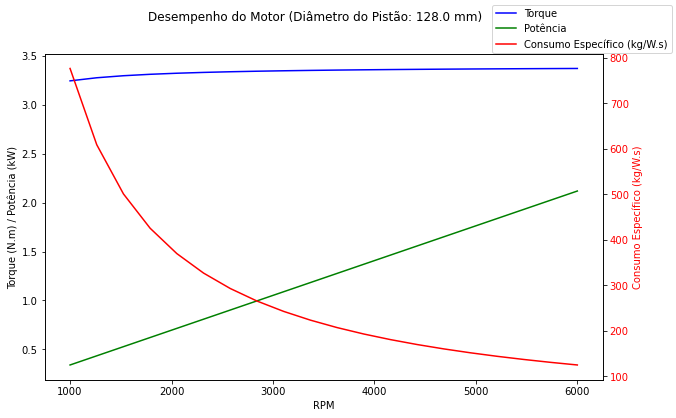

In [135]:
figuras_128 = plotar_graficos(omega_values, torque_values_128, potencia_values_128, consumo_especifico_values_128, diametro_pistao_128)

In [149]:
import plotly.graph_objects as go

def plotar_graficos(omega_values, torque_values, potencia_values, consumo_especifico_values, diametro_pistao):
    # Criando a figura
    fig = go.Figure()

    # Adicionando as curvas de torque e potência
    fig.add_trace(go.Scatter(x=omega_values, y=torque_values, mode='lines', name='Torque', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=omega_values, y=potencia_values, mode='lines', name='Potência', line=dict(color='green')))
    
    # Configurando o eixo y para torque e potência
    max_torque_potencia = max(max(torque_values), max(potencia_values))
    fig.update_layout(yaxis=dict(title='Torque (N.m) / Potência (kW)', range=[0, max_torque_potencia * 1.1]))
    
    # Adicionando a curva de consumo específico
    fig.add_trace(go.Scatter(x=omega_values, y=consumo_especifico_values, mode='lines', name='Consumo Específico', line=dict(color='red'), yaxis='y2'))
    
    # Configurando o eixo y2 para consumo específico
    max_consumo_especifico = max(consumo_especifico_values)
    fig.update_layout(yaxis2=dict(title='Consumo Específico (kg/W.s)', overlaying='y', side='right', range=[0, max_consumo_especifico * 1.1], showgrid=True))
    
    # Configurando o eixo x
    fig.update_layout(xaxis=dict(title='RPM'))
    
    # Configurando layout geral
    fig.update_layout(title=f'Desempenho do Motor (Diâmetro do Pistão: {diametro_pistao * 1000} mm)',
                      height=600, width=1000, legend=dict(x=1.1, y=1.0))
    
    return fig


In [150]:
plotar_graficos(omega_values, torque_values_128, potencia_values_128, consumo_especifico_values_128, diametro_pistao_128)

In [144]:
#Bibliotecas Necessárias
import numpy as np
import cantera as ct
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import streamlit as st

def pv():

    '''Essa função configura e executa uma simulação de um motor a combustão interna e 
    plota um diagrama P-V usando a biblioteca Plotly.'''

    # Mecanismo de reação, tipo de cinética e composições

    mol_c12h26 = 1
    mol_O2_needed = 18.5* mol_c12h26

    # Composição correta do ar considerando o excesso de ar
    excesso_ar = 0.5  # 50% de excesso de ar
    mol_O2_ar = mol_O2_needed * (1 + excesso_ar)
    mol_N2_ar = 3.76 * mol_O2_needed
    comp_ar = f'O2:{mol_O2_ar}, N2:{mol_N2_ar}'
    mecanismo_reacao = 'nDodecane_Reitz.yaml'
    nome_fase = 'nDodecane_IG'
    #comp_ar = 'o2:1, n2:3.76'
    comp_combustivel = 'c12h26:1'

    f = 3000. / 60.         # velocidade do motor [1/s] (3000 rpm)
    V_H = .5e-3             # volume deslocado [m**3]
    epsilon = 14.          # razão de compressão [-]
    d_pistao = 128 / 1000   # diâmetro do pistão [m]

    # Temperatura, pressão e composição do turbocompressor
    T_entrada = 300.        # K
    p_entrada = 1.3e5       # Pa
    comp_entrada = comp_ar

    # Pressão de saída
    p_saida = 1.2e5         # Pa

    # Propriedades do combustível 
    T_injetor = 300.        # K
    p_injetor = 1600e5      # Pa
    comp_injetor = comp_combustivel

    # Propriedades do ambiente
    T_ambiente = 300.       # K
    p_ambiente = 1e5        # Pa
    comp_ambiente = comp_ar

    # Coeficiente de atrito da válvula de entrada, tempos de abertura e fechamento
    coef_atrito_entrada = 1.e-6
    abertura_entrada = -18. / 180. * np.pi
    fechamento_entrada = 198. / 180. * np.pi

    # Coeficiente de atrito da válvula de saída, tempos de abertura e fechamento
    coef_atrito_saida = 1.e-6
    abertura_saida = 522. / 180 * np.pi
    fechamento_saida = 18. / 180. * np.pi

    # Massa do combustível, tempos de abertura e fechamento do injetor
    abertura_injetor = 350. / 180. * np.pi
    fechamento_injetor = 365. / 180. * np.pi
    massa_injetor = 3.2e-5  # kg

    # Tempo e parâmetros de simulação
    sim_n_revolucoes = 8
    delta_T_max = 20.
    rtol = 1.e-12
    atol = 1.e-16

    
    #### Definir Parâmetros e Funções do Motor de Combustão Interna ####
   

    V_oT = V_H / (epsilon - 1.)
    A_pistao = .25 * np.pi * d_pistao ** 2
    curso = V_H / A_pistao

    def angulo_virabrequim(t):
        """Converte tempo para ângulo de virabrequim"""
        return np.remainder(2 * np.pi * f * t, 4 * np.pi)

    def velocidade_pistao(t):
        """Velocidade aproximada do pistão com perfil de velocidade senoidal"""
        return - curso / 2 * 2 * np.pi * f * np.sin(angulo_virabrequim(t))



    #### Configurar Rede de Reatores ####

    # carregar mecanismo de reação
    gas = ct.Solution(mecanismo_reacao, nome_fase)

    # definir estado inicial e configurar reator
    gas.TPX = T_entrada, p_entrada, comp_entrada
    cilindro = ct.IdealGasReactor(gas)
    cilindro.volume = V_oT

    # definir estado de entrada
    entrada = ct.Reservoir(gas)

    # válvula de entrada
    valvula_entrada = ct.Valve(entrada, cilindro)
    delta_entrada = np.mod(fechamento_entrada - abertura_entrada, 4 * np.pi)
    valvula_entrada.valve_coeff = coef_atrito_entrada
    valvula_entrada.time_function = (lambda t: np.mod(angulo_virabrequim(t) - abertura_entrada, 4 * np.pi) < delta_entrada)

    # definir estado do injetor 
    gas.TPX = T_injetor, p_injetor, comp_injetor
    injetor = ct.Reservoir(gas)

    # injetor é modelado como um controlador de vazão mássica
    controlador_vazao_injetor = ct.MassFlowController(injetor, cilindro)
    delta_injetor = np.mod(fechamento_injetor - abertura_injetor, 4 * np.pi)
    tempo_abertura_injetor = (fechamento_injetor - abertura_injetor) / 2. / np.pi / f
    controlador_vazao_injetor.mass_flow_coeff = massa_injetor / tempo_abertura_injetor
    controlador_vazao_injetor.time_function = (lambda t: np.mod(angulo_virabrequim(t) - abertura_injetor, 4 * np.pi) < delta_injetor)

    # definir pressão de saída 
    gas.TPX = T_ambiente, p_saida, comp_ambiente
    saida = ct.Reservoir(gas)

    # válvula de saída
    valvula_saida = ct.Valve(cilindro, saida)
    delta_saida = np.mod(fechamento_saida - abertura_saida, 4 * np.pi)
    valvula_saida.valve_coeff = coef_atrito_saida
    valvula_saida.time_function = (lambda t: np.mod(angulo_virabrequim(t) - abertura_saida, 4 * np.pi) < delta_saida)

    # definir pressão ambiente 
    gas.TPX = T_ambiente, p_ambiente, comp_ambiente
    ar_ambiente = ct.Reservoir(gas)

    # pistão é modelado como uma parede móvel
    pistao = ct.Wall(ar_ambiente, cilindro)
    pistao.area = A_pistao
    pistao.velocity = velocidade_pistao

    # criar uma rede de reatores contendo o cilindro e limitar o passo de avanço
    sim = ct.ReactorNet([cilindro])
    sim.rtol, sim.atol = rtol, atol
    cilindro.set_advance_limit('temperature', delta_T_max)

    
    #### Executar Simulação do PV ####

    # configurar arrays de dados de saída
    estados = ct.SolutionArray(cilindro.thermo, extra=('t', 'ca', 'V', 'm', 'mdot_in', 'mdot_out', 'dWv_dt'))

    # simular com uma resolução máxima de 1 grau de ângulo de virabrequim
    dt = 1. / (360 * f)
    t_stop = sim_n_revolucoes / f
    while sim.time < t_stop:

        # realizar integração temporal
        sim.advance(sim.time + dt)

        # calcular resultados a serem armazenados
        dWv_dt = - (cilindro.thermo.P - ar_ambiente.thermo.P) * A_pistao * \
            velocidade_pistao(sim.time)

        # anexar dados de saída
        estados.append(cilindro.thermo.state,
                    t=sim.time, ca=angulo_virabrequim(sim.time),
                    V=cilindro.volume, m=cilindro.mass,
                    mdot_in=valvula_entrada.mass_flow_rate,
                    mdot_out=valvula_saida.mass_flow_rate,
                    dWv_dt=dWv_dt)


   
    #### Resultados ####
    
    t = estados.t
    volume_litros = estados.V * 1000    # Convertendo para litros
    pressao_bar = estados.P / 1e5       # Convertendo para bar

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=volume_litros[t > 0.04], y=pressao_bar[t > 0.04], mode='lines'))
    fig.update_layout(xaxis_title='Volume [litros]', yaxis_title='Pressão [bar]', title='Diagrama P-V')
    fig.show()


In [145]:
pv()